In [1]:
import os
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

import imutils
import dlib
from facetracking import LandmarkProcessor

### choose dataset by commenting/uncommenting

# # DDD dataset
# path = '/home/dimoik/Downloads/data/DDD/'
# suffix = 'ddd'

# nthuddd2 dataset
path = '/home/dimoik/Downloads/data/nthuddd2/'
suffix = 'nthu'

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [3]:
# image = cv2.imread(path+"drowsy/"+"A0001.png")
# image = imutils.resize(image, width=500)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# rects = detector(gray, 1)
# landmarks = predictor(gray, rects[0])

# processor = LandmarkProcessor(landmarks)
# ear = processor.calculate_ear()
# mar = processor.calculate_mouth()

# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# s = 15
# for i in range(36, 42):
#     plt.scatter(landmarks.part(i).x, landmarks.part(i).y, color="red", s=s)
# for i in range(42, 48):
#     plt.scatter(landmarks.part(i).x, landmarks.part(i).y, color="red", s=s)
# for i in range(48, 68):
#     plt.scatter(landmarks.part(i).x, landmarks.part(i).y, color="green", s=s)
# plt.axis('off')
# plt.show()

In [4]:
# image = cv2.imread(path+"notdrowsy/"+"b0010.png")
# image = imutils.resize(image, width=500)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# rects = detector(gray, 1)
# landmarks = predictor(gray, rects[0])

# processor = LandmarkProcessor(landmarks)
# ear = processor.calculate_ear()
# mar = processor.calculate_mouth()

# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# s = 15
# for i in range(36, 42):
#     plt.scatter(landmarks.part(i).x, landmarks.part(i).y, color="red", s=s)
# for i in range(42, 48):
#     plt.scatter(landmarks.part(i).x, landmarks.part(i).y, color="red", s=s)
# for i in range(48, 68):
#     plt.scatter(landmarks.part(i).x, landmarks.part(i).y, color="green", s=s)
# plt.axis('off')
# plt.show()

In [5]:
drowsy_feats = []
drowsy_list = os.listdir(path+"drowsy/")
print(len(drowsy_list))

for name in drowsy_list:
    image = cv2.imread(path+"drowsy/"+name)
    image = imutils.resize(image, width=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    rects = detector(gray, 1)
    if len(rects) == 0:
        continue

    landmarks = predictor(gray, rects[0])

    processor = LandmarkProcessor(landmarks)
    ear = processor.calculate_ear()
    mar = processor.calculate_mouth()
    drowsy_feats.append((ear, mar))

drowsy_feats = np.array(drowsy_feats)

with open("./feats/"+suffix+"_dlib_drowsy_feats", "wb") as fp:
    pickle.dump(drowsy_feats, fp)

36030


In [6]:
with open("./feats/"+suffix+"_dlib_drowsy_feats", "rb") as fp:
    drowsy_feats = pickle.load(fp)

In [7]:
non_drowsy_feats = []
non_drowsy_list = os.listdir(path+"notdrowsy/")
print(len(non_drowsy_list))

for name in non_drowsy_list:
    image = cv2.imread(path+"notdrowsy/"+name)
    image = imutils.resize(image, width=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    rects = detector(gray, 1)
    if len(rects) == 0:
        continue

    landmarks = predictor(gray, rects[0])

    processor = LandmarkProcessor(landmarks)
    ear = processor.calculate_ear()
    mar = processor.calculate_mouth()
    non_drowsy_feats.append((ear, mar))

non_drowsy_feats = np.array(non_drowsy_feats)

with open("./feats/"+suffix+"_dlib_non_drowsy_feats", "wb") as fp:
    pickle.dump(non_drowsy_feats, fp)

30491


In [8]:
with open("./feats/"+suffix+"_dlib_non_drowsy_feats", "rb") as fp:
    non_drowsy_feats = pickle.load(fp)

### Data Statistics

In [9]:
print(f"Drowsy Images: {drowsy_feats.shape[0]}")
drowsy_ear = drowsy_feats[:, 0]
print(f"EAR | Min, Median, Mean, Max, SD: [{drowsy_ear.min()}, {np.median(drowsy_ear)}, {drowsy_ear.mean()}, {drowsy_ear.max()}, {drowsy_ear.std()}]")
drowsy_mar = drowsy_feats[:, 1]
print(f"MAR | Min, Median, Mean, Max, SD: [{drowsy_mar.min()}, {np.median(drowsy_mar)}, {drowsy_mar.mean()}, {drowsy_mar.max()}, {drowsy_mar.std()}]")

Drowsy Images: 35224
EAR | Min, Median, Mean, Max, SD: [0.07693039197461471, 0.2589458762555122, 0.26566948432902715, 0.5082680388952157, 0.05362504100775118]
MAR | Min, Median, Mean, Max, SD: [1.509230856356235, 14.346292585395702, 17.323299248576497, 64.3364507016737, 8.620875724510203]


In [10]:
print(f"Non Drowsy Images: {non_drowsy_feats.shape[0]}")
non_drowsy_ear = non_drowsy_feats[:, 0]
print(f"EAR | Min, Median, Mean, Max, SD: [{non_drowsy_ear.min()}, {np.median(non_drowsy_ear)}, {non_drowsy_ear.mean()}, {non_drowsy_ear.max()}, {non_drowsy_ear.std()}]")
non_drowsy_mar = non_drowsy_feats[:, 1]
print(f"MAR | Min, Median, Mean, Max, SD: [{non_drowsy_mar.min()}, {np.median(non_drowsy_mar)}, {non_drowsy_mar.mean()}, {non_drowsy_mar.max()}, {non_drowsy_mar.std()}]")

Non Drowsy Images: 28942
EAR | Min, Median, Mean, Max, SD: [0.07091922823802013, 0.27210182664154076, 0.27376373568151063, 0.6083473956111634, 0.07354112176694118]
MAR | Min, Median, Mean, Max, SD: [0.3299831645537034, 15.567951410224484, 16.424069401745836, 39.308721113202814, 4.0573619948168025]


### Classification

In [11]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve

In [12]:
s = 192
np.random.seed(s)
random.seed(s)

drowsy_labs = np.ones(drowsy_feats.shape[0])
non_drowsy_labs = np.zeros(non_drowsy_feats.shape[0])

X = np.vstack((drowsy_feats, non_drowsy_feats))
y = np.concatenate((drowsy_labs, non_drowsy_labs))

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(5, 3), random_state=1, max_iter=1000)
mlp.fit(X_train, y_train)
mlp_preds = mlp.predict(X_test)
mlp_probas = mlp.predict_proba(X_test)

In [14]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_probas = svm.predict_proba(X_test)

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_probas = rf.predict_proba(X_test)

#### Metrics

Accuracy, Precision, Recall, Sensitivity, Specificity, Macro Precision, Macro F1-Score

ROC, Precision-Recall

In [16]:
print("Classifier: RF")
preds = rf_preds
print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Macro Precision: {precision_score(y_test, preds, average='macro')}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"Macro F1 score: {f1_score(y_test, preds, average='macro')}")

Classifier: RF
Accuracy: 0.6393841166936791
Precision: 0.6612589227774173
Macro Precision: 0.6354411153027757
Recall: 0.697387932017794
Macro F1 score: 0.633856892409407


In [17]:
print("Classifier: MLP")
preds = mlp_preds
print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Macro Precision: {precision_score(y_test, preds, average='macro')}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"Macro F1 score: {f1_score(y_test, preds, average='macro')}")

Classifier: MLP
Accuracy: 0.6009225782321407
Precision: 0.626782459526107
Macro Precision: 0.5958930912671487
Recall: 0.6668187521387019
Macro F1 score: 0.5942842370393101


In [18]:
print("Classifier: SVM")
preds = svm_preds
print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Macro Precision: {precision_score(y_test, preds, average='macro')}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"Macro F1 score: {f1_score(y_test, preds, average='macro')}")

Classifier: SVM
Accuracy: 0.6347088891659394
Precision: 0.6172082896540602
Macro Precision: 0.6557615191747368
Recall: 0.8730466522185468
Macro F1 score: 0.59317018407868


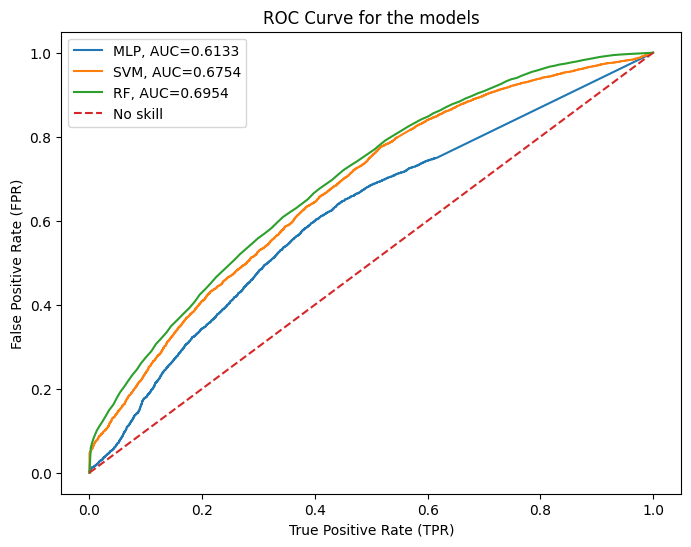

In [19]:
plt.figure(figsize=(8, 6))
plt.title("ROC Curve for the models")
# mlp
fpr, tpr, _ = roc_curve(y_test, mlp_probas[:, 1])
auc = round(roc_auc_score(y_test, mlp_probas[:, 1]), 4)
plt.plot(fpr, tpr, label="MLP, AUC="+str(auc))

# svm
fpr, tpr, _ = roc_curve(y_test, svm_probas[:, 1])
auc = round(roc_auc_score(y_test, svm_probas[:, 1]), 4)
plt.plot(fpr, tpr, label="SVM, AUC="+str(auc))

# RF
fpr, tpr, _ = roc_curve(y_test, rf_probas[:, 1])
auc = round(roc_auc_score(y_test, rf_probas[:, 1]), 4)
plt.plot(fpr, tpr, label="RF, AUC="+str(auc))

plt.plot(fpr, fpr, '--', label="No skill")
plt.legend()
plt.xlabel('True Positive Rate (TPR)')
plt.ylabel('False Positive Rate (FPR)')
plt.show()

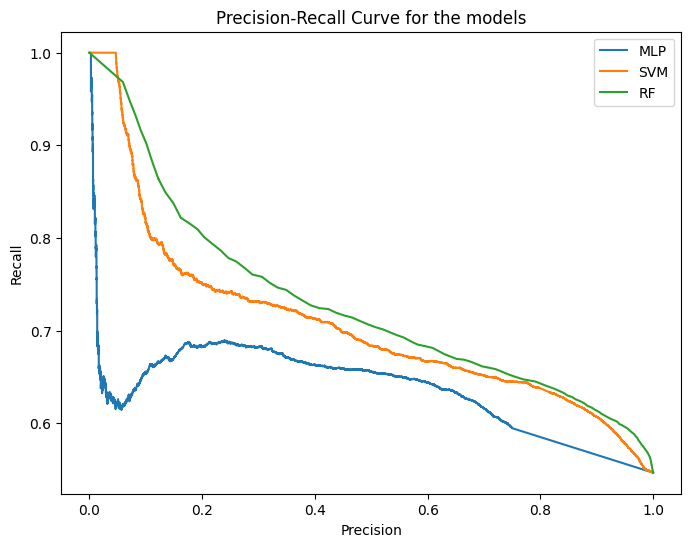

In [20]:
plt.figure(figsize=(8, 6))
plt.title("Precision-Recall Curve for the models")

# mlp
y, x, _ = precision_recall_curve(y_test, mlp_probas[:, 1])
plt.plot(x, y, label="MLP")

# svm
y, x, _ = precision_recall_curve(y_test, svm_probas[:, 1])
plt.plot(x, y, label="SVM")

# RF
y, x, _ = precision_recall_curve(y_test, rf_probas[:, 1])
plt.plot(x, y, label="RF")

plt.legend()
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()